In [4]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

%matplotlib inline

In [5]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 4)

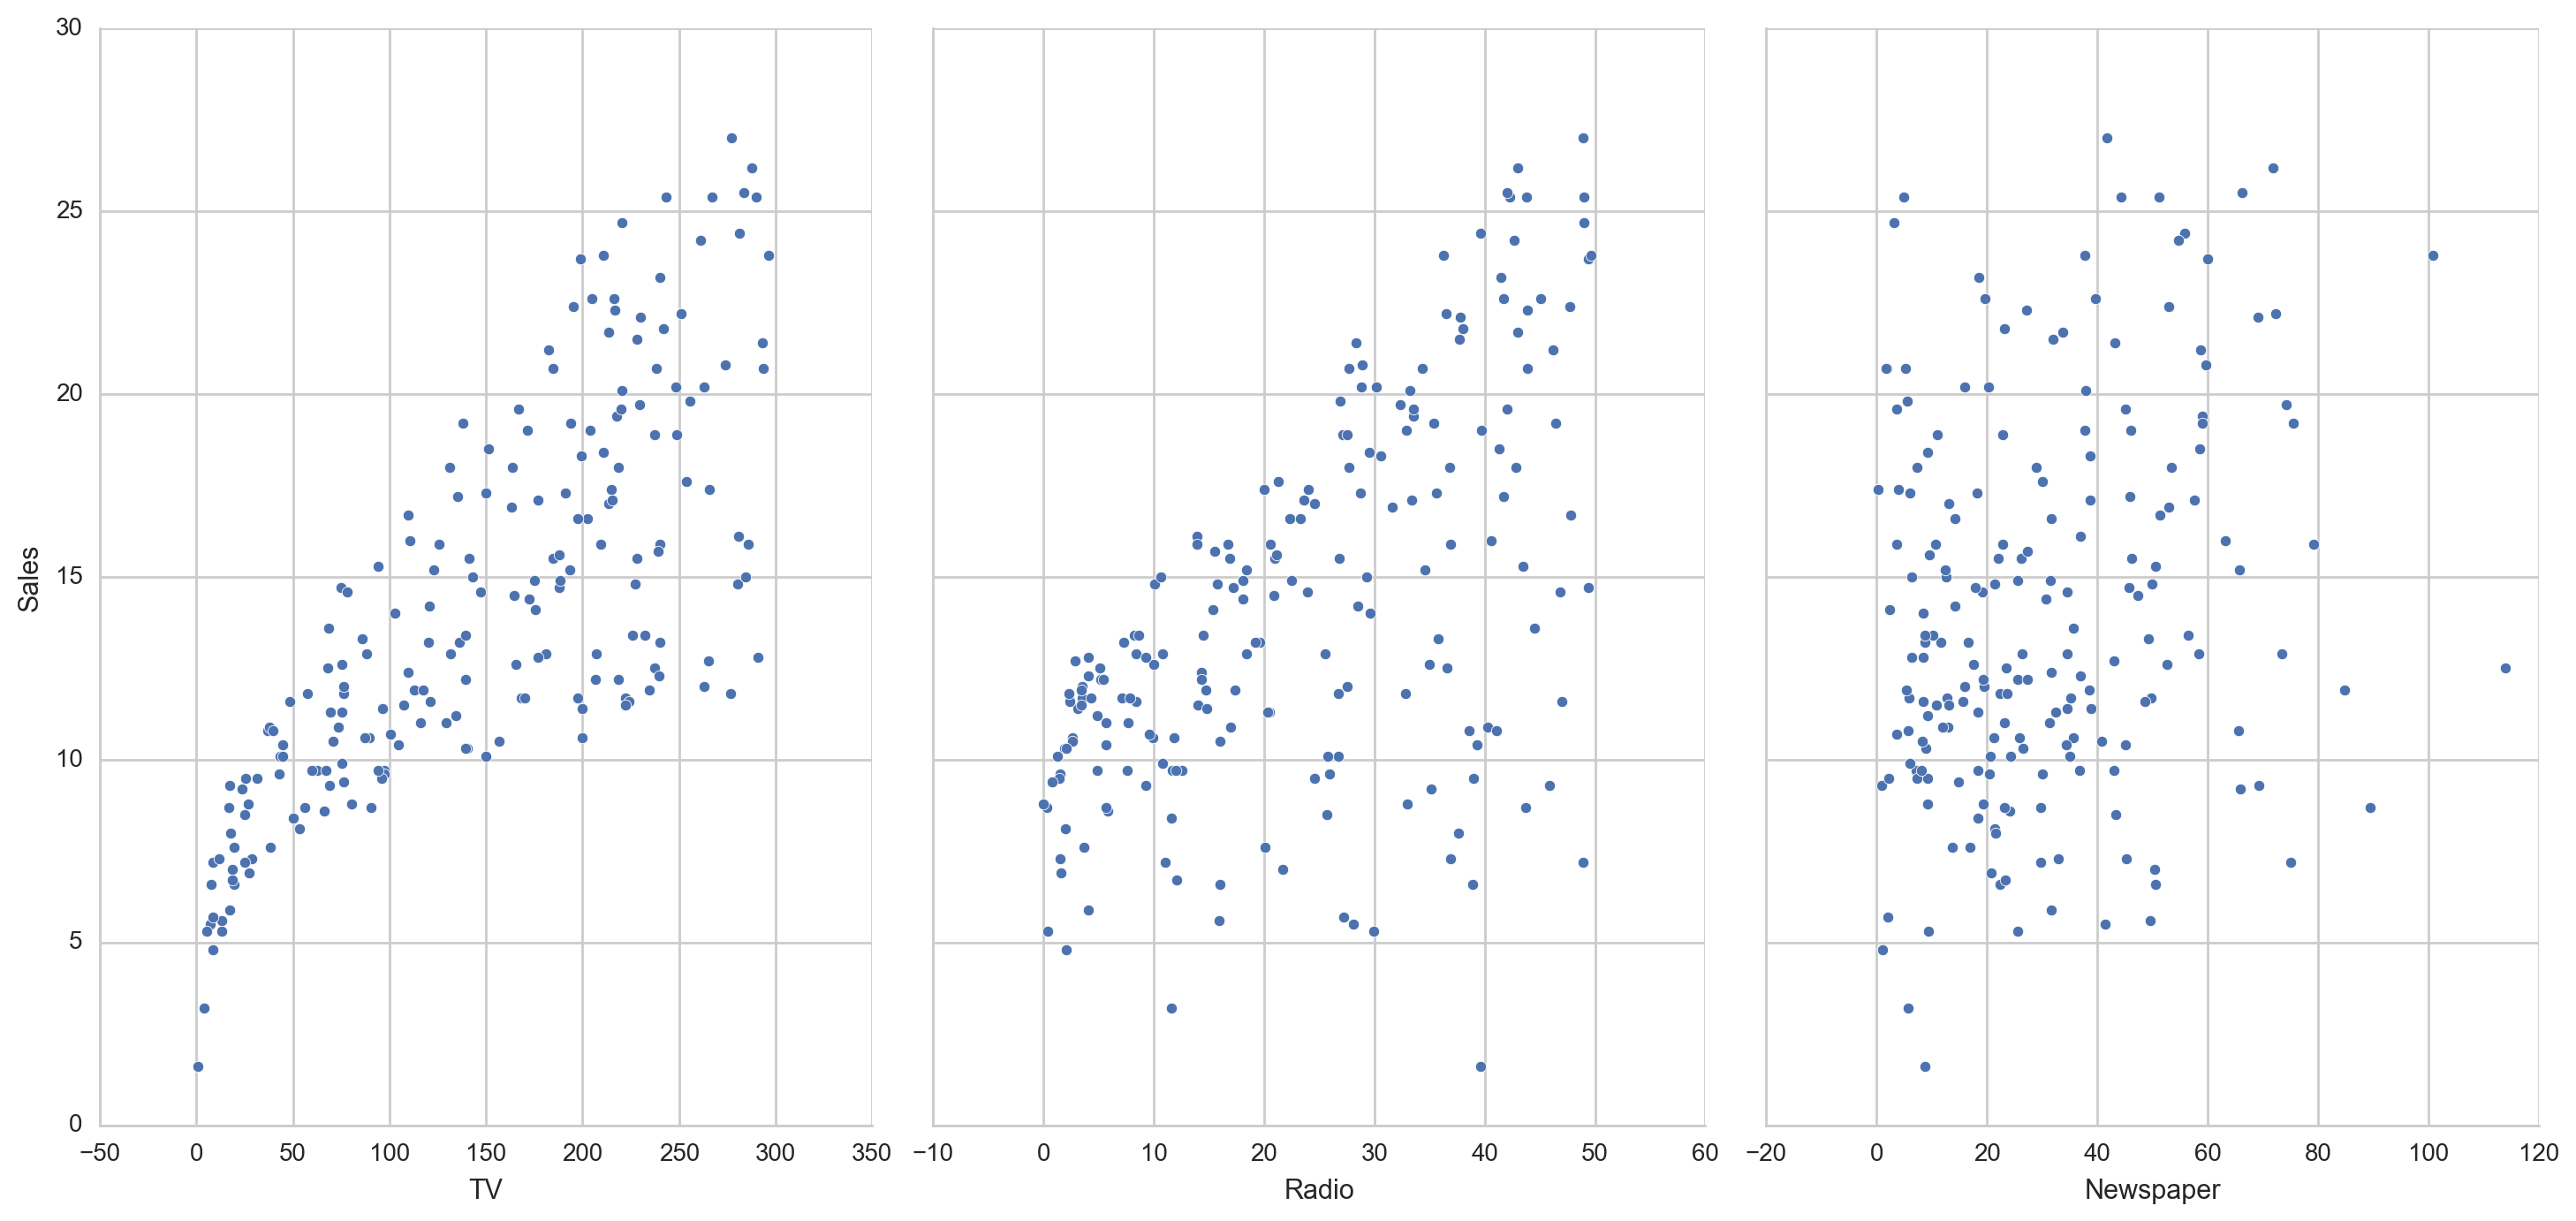

In [7]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

In [8]:
# stats model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [9]:
# scikit-learn
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

lm2 = LinearRegression()
lm2.fit(X, y)

print lm2.intercept_
print lm2.coef_

7.03259354913
[ 0.04753664]


In [10]:
7.032594 + 0.047537*50

9.409444

In [11]:
# stats model
X_new = pd.DataFrame({'TV': [50]})
lm1.predict(X_new)

array([ 9.40942557])

In [12]:
# scikit-learn
lm2.predict(50)

array([ 9.40942557])

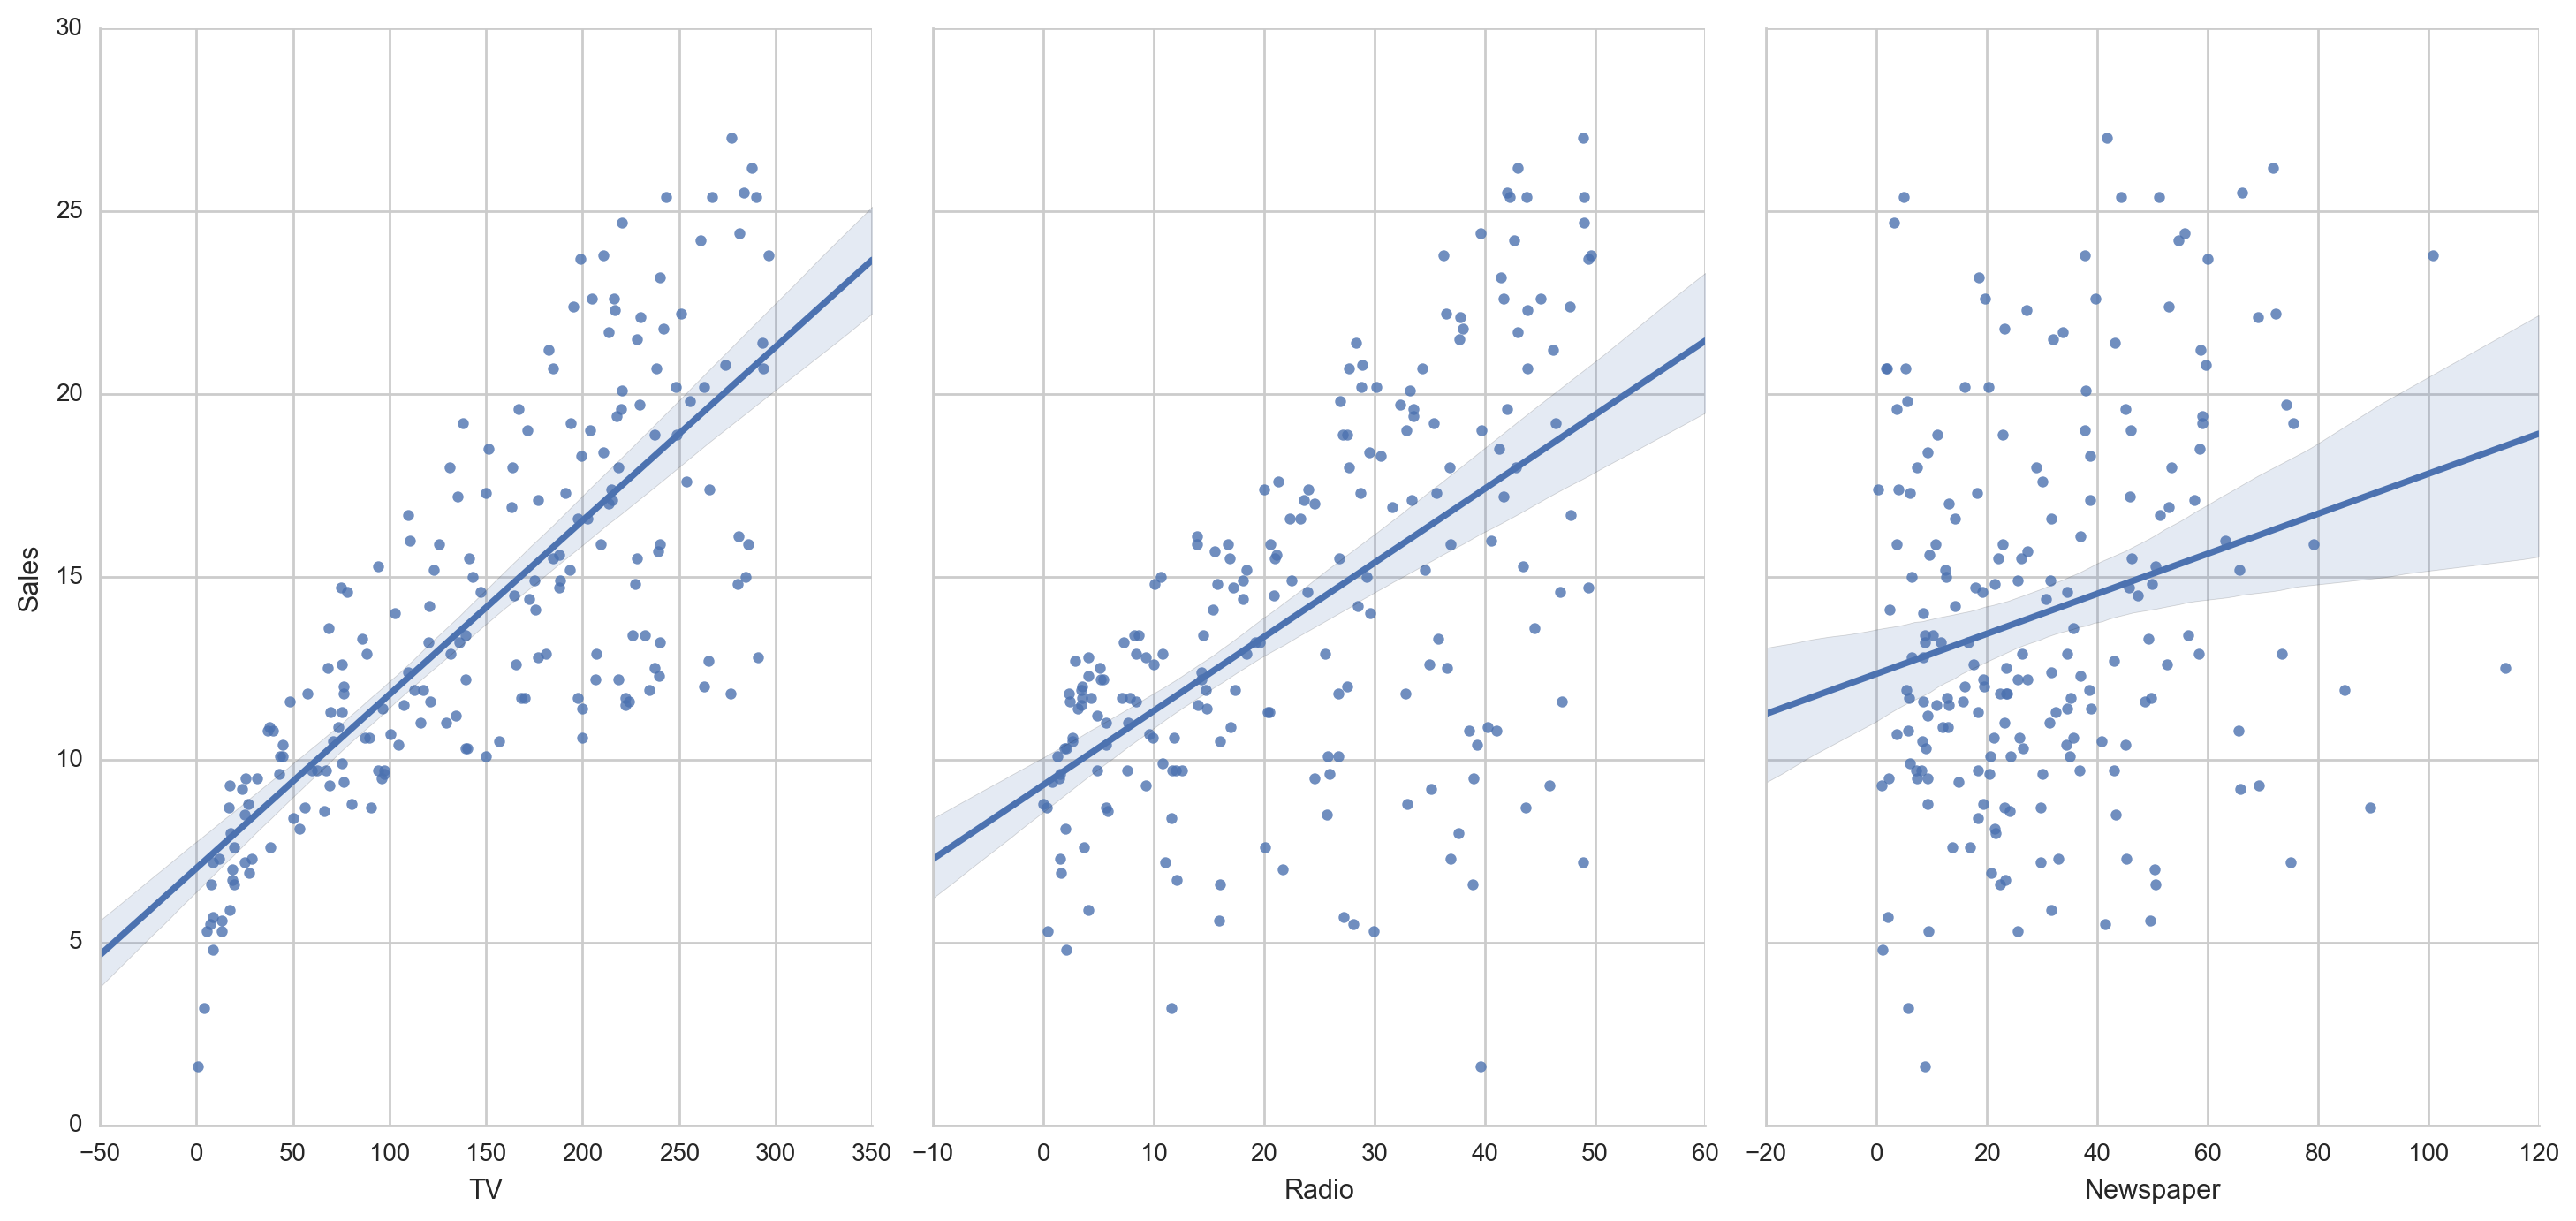

In [13]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [14]:
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [15]:
lm1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [16]:
# stats model
lm1.rsquared

0.61187505085007099

In [17]:
# scikit-learn
lm2.score(X, y)

0.61187505085007099

In [19]:
# stats model
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [20]:
#scikit-learn

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print lm2.intercept_
print lm2.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [22]:
zip(feature_cols, lm2.coef_)

[('TV', 0.045764645455397608),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

In [23]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 17 May 2017   Prob (F-statistic):           1.58e-96
Time:                        20:46:04   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm1.rsquared

0.89719426108289568

In [25]:
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.89721063817895219

In [27]:
#define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print metrics.mean_absolute_error(y_true, y_pred)
print metrics.mean_squared_error(y_true, y_pred)
print np.sqrt(metrics.mean_squared_error(y_true, y_pred))

10.0
150.0
12.2474487139


In [28]:
# include Newspaper
X = data[['TV', 'Radio', 'Newspaper']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303


In [29]:
# exclude Newspaper
X = data[['TV', 'Radio']]
y = data.Sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
y_pred = lm2.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.38790346994


In [31]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [32]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [33]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
zip(feature_cols, lm2.coef_)

[('TV', 0.045719820924362775),
 ('Radio', 0.18872814313427869),
 ('Newspaper', -0.0010976794483516079),
 ('Size_large', 0.0574238508548277)]

In [34]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [35]:
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


In [36]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


In [37]:
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [38]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
zip(feature_cols, lm2.coef_)


[('TV', 0.045744010363313749),
 ('Radio', 0.18786669552525811),
 ('Newspaper', -0.0010876977267108138),
 ('Size_large', 0.077396607497479092),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]